Name: Shameem Kathiwalla
Date July 21, 2020
Project: Machine Learn Benz cars

Answers are located below. Interestingly the PCA reduced features to 6 from 376. 

Goal: Optimal algorithms will contribute to faster testing, resulting in lower 
carbon dioxide emissions without reducing Daimler’s standards.

Questions asked: 
    # Following actions should be performed:

* If for any column(s), the variance is equal to zero, then you need to remove those variable(s).

* Check for null and unique values for test and train sets

* Apply label encoder.

* Perform dimensionality reduction.

* Predict your test_df values using xgboost

In [126]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

In [127]:
train_benz=pd.read_csv('Benztrain.csv')
test_benz=pd.read_csv('Benztest.csv')

In [128]:
train_benz=pd.DataFrame(train_benz)
test_benz=pd.DataFrame(test_benz)

In [129]:
train_benz.describe()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [130]:
#create a separate valraible for y data
benz_target=train_benz['y']
benz_target

0       130.81
1        88.53
2        76.26
3        80.62
4        78.02
         ...  
4204    107.39
4205    108.77
4206    109.22
4207     87.48
4208    110.85
Name: y, Length: 4209, dtype: float64

In [131]:
test_benz.describe()

,ID,X10,X11,X12,X13,X14,X15,X16,X17,X18,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4211.039202,0.019007,0.000238,0.074364,0.061060,0.427893,0.000713,0.002613,0.008791,0.010216,...,0.325968,0.049656,0.311951,0.019244,0.011879,0.008078,0.008791,0.000475,0.000713,0.001663
std,2423.078926,0.136565,0.015414,0.262394,0.239468,0.494832,0.026691,0.051061,0.093357,0.100570,...,0.468791,0.217258,0.463345,0.137399,0.108356,0.089524,0.093357,0.021796,0.026691,0.040752
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2115.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4202.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6310.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8416.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [132]:
print(train_benz.shape)
print(test_benz.shape)

(4209, 378)
(4209, 377)


In [133]:
train_benz.columns

Index(['ID', 'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=378)

In [134]:
test_benz.columns

Index(['ID', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8', 'X10',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=377)

In [135]:
print('Train:',train_benz.dtypes)
print('Test:',test_benz.dtypes)

Train: ID        int64
y       float64
X0       object
X1       object
X2       object
         ...   
X380      int64
X382      int64
X383      int64
X384      int64
X385      int64
Length: 378, dtype: object
Test: ID       int64
X0      object
X1      object
X2      object
X3      object
         ...  
X380     int64
X382     int64
X383     int64
X384     int64
X385     int64
Length: 377, dtype: object


In [136]:
train_benz.dtypes.value_counts()

int64      369
object       8
float64      1
dtype: int64

In [137]:
test_benz.dtypes.value_counts()

int64     369
object      8
dtype: int64

In [138]:
train_benz.index

RangeIndex(start=0, stop=4209, step=1)

In [139]:
test_benz.index

RangeIndex(start=0, stop=4209, step=1)

In [140]:
train_benz.ndim

2

In [141]:
test_benz.ndim

2

In [142]:
train_benz.describe

<bound method NDFrame.describe of         ID       y  X0 X1  X2 X3 X4  X5 X6 X8  ...  X375  X376  X377  X378  \
0        0  130.81   k  v  at  a  d   u  j  o  ...     0     0     1     0   
1        6   88.53   k  t  av  e  d   y  l  o  ...     1     0     0     0   
2        7   76.26  az  w   n  c  d   x  j  x  ...     0     0     0     0   
3        9   80.62  az  t   n  f  d   x  l  e  ...     0     0     0     0   
4       13   78.02  az  v   n  f  d   h  d  n  ...     0     0     0     0   
...    ...     ...  .. ..  .. .. ..  .. .. ..  ...   ...   ...   ...   ...   
4204  8405  107.39  ak  s  as  c  d  aa  d  q  ...     1     0     0     0   
4205  8406  108.77   j  o   t  d  d  aa  h  h  ...     0     1     0     0   
4206  8412  109.22  ak  v   r  a  d  aa  g  e  ...     0     0     1     0   
4207  8415   87.48  al  r   e  f  d  aa  l  u  ...     0     0     0     0   
4208  8417  110.85   z  r  ae  c  d  aa  g  w  ...     1     0     0     0   

      X379  X380  X382  X383 

In [143]:
train_benz.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [144]:
test_benz.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [145]:
#check for null values in train and test:
#there appear to be no null values in the train & test data set.
train_benz.isna()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4205,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4206,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4207,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [146]:
train_benz.isnull().sum().value_counts()

0    378
dtype: int64

In [147]:
test_benz.isna()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4205,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4206,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4207,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [148]:
test_benz.isnull().sum().value_counts()

0    377
dtype: int64

In [149]:
#check for unique values in test and train data. 
uniqueValuesTrain = train_benz.nunique()
print('Count of unique values in each Train column :',uniqueValuesTrain)
unqvaluesTest=test_benz.nunique()
print('Count of unique values in each Test column :',unqvaluesTest)

Count of unique values in each Train column : ID      4209
y       2545
X0        47
X1        27
X2        44
        ... 
X380       2
X382       2
X383       2
X384       2
X385       2
Length: 378, dtype: int64
Count of unique values in each Test column : ID      4209
X0        49
X1        27
X2        45
X3         7
        ... 
X380       2
X382       2
X383       2
X384       2
X385       2
Length: 377, dtype: int64


In [150]:
#remove columns with zero variance. 
vartrain=train_benz.var()

In [151]:
vartest=test_benz.var()

In [152]:
#there are 12 columns with zero variance which need to be removed from training data.
#there are 5 columns with zero variance which need to be removed  
print('Train set, zero variance count:',vartrain.value_counts())

Train set, zero variance count: 0.000000    12
0.021840     5
0.001424     4
0.041164     4
0.007078     4
            ..
0.011277     1
0.068041     1
0.133064     1
0.247007     1
0.158060     1
Length: 303, dtype: int64


In [153]:
print('Test set, zero variance count:',vartest.value_counts())

Test set, zero variance count: 0.000000    5
0.023200    5
0.005906    4
0.038112    4
0.096252    3
           ..
0.000712    1
0.246767    1
0.020020    1
0.028600    1
0.006610    1
Length: 319, dtype: int64


In [154]:
#dropping ID and y column from train dataset
train_benz=train_benz.drop(['ID'], axis=1)

In [155]:
train_benz.head()

,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,130.81,k,v,at,a,d,u,j,o,0,...,0,0,1,0,0,0,0,0,0,0
1,88.53,k,t,av,e,d,y,l,o,0,...,1,0,0,0,0,0,0,0,0,0
2,76.26,az,w,n,c,d,x,j,x,0,...,0,0,0,0,0,0,1,0,0,0
3,80.62,az,t,n,f,d,x,l,e,0,...,0,0,0,0,0,0,0,0,0,0
4,78.02,az,v,n,f,d,h,d,n,0,...,0,0,0,0,0,0,0,0,0,0


In [156]:
#dropping ID column from test dataset
test_benz=test_benz.drop(['ID'],axis=1)

In [157]:
test_benz.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,az,v,n,f,d,t,a,w,0,0,...,0,0,0,1,0,0,0,0,0,0
1,t,b,ai,a,d,b,g,y,0,0,...,0,0,1,0,0,0,0,0,0,0
2,az,v,as,f,d,a,j,j,0,0,...,0,0,0,1,0,0,0,0,0,0
3,az,l,n,f,d,z,l,n,0,0,...,0,0,0,1,0,0,0,0,0,0
4,w,s,as,c,d,y,i,m,0,0,...,1,0,0,0,0,0,0,0,0,0


In [158]:
#As asked i have used Label encode columns X0-X6,X8 in train and test data. 
#I will note though that each column has many values. for e.g X0 has 47 unique values.
#its hard to determine how to group these as we dont know what the letters signify.

In [159]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [160]:
print('X0 unique values:', train_benz['X0'].nunique())
print('X1 unique values:', train_benz['X1'].nunique())
print('X2 unique values:', train_benz['X2'].nunique())
print('X3 unique values:', train_benz['X3'].nunique())
print('X4 unique values:', train_benz['X4'].nunique())
print('X5 unique values:', train_benz['X5'].nunique())
print('X6 unique values:', train_benz['X6'].nunique())
print('X8 unique values:', train_benz['X8'].nunique())

X0 unique values: 47
X1 unique values: 27
X2 unique values: 44
X3 unique values: 7
X4 unique values: 4
X5 unique values: 29
X6 unique values: 12
X8 unique values: 25


In [161]:
train_benz['X0'].unique()

array(['k', 'az', 't', 'al', 'o', 'w', 'j', 'h', 's', 'n', 'ay', 'f', 'x',
       'y', 'aj', 'ak', 'am', 'z', 'q', 'at', 'ap', 'v', 'af', 'a', 'e',
       'ai', 'd', 'aq', 'c', 'aa', 'ba', 'as', 'i', 'r', 'b', 'ax', 'bc',
       'u', 'ad', 'au', 'm', 'l', 'aw', 'ao', 'ac', 'g', 'ab'],
      dtype=object)

In [162]:
train_benz['X0']=le.fit_transform(train_benz['X0'])

In [163]:
train_benz['X0']

0       32
1       32
2       20
3       20
4       20
        ..
4204     8
4205    31
4206     8
4207     9
4208    46
Name: X0, Length: 4209, dtype: int64

In [164]:
train_benz['X1']=le.fit_transform(train_benz['X1'])

In [165]:
train_benz['X2']=le.fit_transform(train_benz['X2'])

In [166]:
train_benz['X3']=le.fit_transform(train_benz['X3'])

In [167]:
train_benz['X4']=le.fit_transform(train_benz['X4'])

In [168]:
train_benz['X5']=le.fit_transform(train_benz['X5'])

In [169]:
train_benz['X6']=le.fit_transform(train_benz['X6'])

In [170]:
train_benz['X8']=le.fit_transform(train_benz['X8'])

In [171]:
train_benz.head()

,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,130.81,32,23,17,0,3,24,9,14,0,...,0,0,1,0,0,0,0,0,0,0
1,88.53,32,21,19,4,3,28,11,14,0,...,1,0,0,0,0,0,0,0,0,0
2,76.26,20,24,34,2,3,27,9,23,0,...,0,0,0,0,0,0,1,0,0,0
3,80.62,20,21,34,5,3,27,11,4,0,...,0,0,0,0,0,0,0,0,0,0
4,78.02,20,23,34,5,3,12,3,13,0,...,0,0,0,0,0,0,0,0,0,0


In [172]:
# use label encoder on test dataset

In [173]:
test_benz.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,az,v,n,f,d,t,a,w,0,0,...,0,0,0,1,0,0,0,0,0,0
1,t,b,ai,a,d,b,g,y,0,0,...,0,0,1,0,0,0,0,0,0,0
2,az,v,as,f,d,a,j,j,0,0,...,0,0,0,1,0,0,0,0,0,0
3,az,l,n,f,d,z,l,n,0,0,...,0,0,0,1,0,0,0,0,0,0
4,w,s,as,c,d,y,i,m,0,0,...,1,0,0,0,0,0,0,0,0,0


In [174]:
print('X0 unique values:', test_benz['X0'].nunique())
print('X1 unique values:', test_benz['X1'].nunique())
print('X2 unique values:', test_benz['X2'].nunique())
print('X3 unique values:', test_benz['X3'].nunique())
print('X4 unique values:', test_benz['X4'].nunique())
print('X5 unique values:', test_benz['X5'].nunique())
print('X6 unique values:', test_benz['X6'].nunique())
print('X8 unique values:', test_benz['X8'].nunique())

X0 unique values: 49
X1 unique values: 27
X2 unique values: 45
X3 unique values: 7
X4 unique values: 4
X5 unique values: 32
X6 unique values: 12
X8 unique values: 25


In [175]:
test_benz['X0']=le.fit_transform(test_benz['X0'])

In [176]:
test_benz['X1']=le.fit_transform(test_benz['X1'])

In [177]:
test_benz['X2']=le.fit_transform(test_benz['X2'])

In [178]:
test_benz['X3']=le.fit_transform(test_benz['X3'])

In [179]:
test_benz['X4']=le.fit_transform(test_benz['X4'])

In [180]:
test_benz['X5']=le.fit_transform(test_benz['X5'])

In [181]:
test_benz['X6']=le.fit_transform(test_benz['X6'])

In [182]:
test_benz['X8']=le.fit_transform(test_benz['X8'])

In [183]:
test_benz.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,21,23,34,5,3,26,0,22,0,0,...,0,0,0,1,0,0,0,0,0,0
1,42,3,8,0,3,9,6,24,0,0,...,0,0,1,0,0,0,0,0,0,0
2,21,23,17,5,3,0,9,9,0,0,...,0,0,0,1,0,0,0,0,0,0
3,21,13,34,5,3,31,11,13,0,0,...,0,0,0,1,0,0,0,0,0,0
4,45,20,17,2,3,30,8,12,0,0,...,1,0,0,0,0,0,0,0,0,0


In [184]:
#perform dimensionality reduction

In [185]:
#1. removing zero Variance columns: 12 columns are removed by this method.columns go 
#from 377 to 365.
#separately performed the same on the test data where only 5 columns were reduced that had
#zerovariance.
#Please see above.


In [186]:
x=train_benz.loc[:,:]

In [187]:
x.head()

,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,130.81,32,23,17,0,3,24,9,14,0,...,0,0,1,0,0,0,0,0,0,0
1,88.53,32,21,19,4,3,28,11,14,0,...,1,0,0,0,0,0,0,0,0,0
2,76.26,20,24,34,2,3,27,9,23,0,...,0,0,0,0,0,0,1,0,0,0
3,80.62,20,21,34,5,3,27,11,4,0,...,0,0,0,0,0,0,0,0,0,0
4,78.02,20,23,34,5,3,12,3,13,0,...,0,0,0,0,0,0,0,0,0,0


In [188]:
print(x.index)
print(x.columns.value_counts().sum())

RangeIndex(start=0, stop=4209, step=1)
377


In [189]:
print(x.shape)

(4209, 377)


In [190]:
#remove constant features using variance threshold where threshold is set at zero
constant_filter = VarianceThreshold(threshold=0)

In [191]:
#apply filter to (x) training set
constant_filter.fit(x)

VarianceThreshold(threshold=0)

In [192]:
#features that are not constant
len(x.columns[constant_filter.get_support(indices=True)])

365

In [193]:
x.shape

(4209, 377)

In [194]:
#remove constant features
x = constant_filter.transform(x)

In [195]:
x=pd.DataFrame(x)

In [196]:
x.head()

,0,1,2,3,4,5,6,7,8,9,...,355,356,357,358,359,360,361,362,363,364
0,130.81,32.0,23.0,17.0,0.0,3.0,24.0,9.0,14.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,88.53,32.0,21.0,19.0,4.0,3.0,28.0,11.0,14.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,76.26,20.0,24.0,34.0,2.0,3.0,27.0,9.0,23.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,80.62,20.0,21.0,34.0,5.0,3.0,27.0,11.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,78.02,20.0,23.0,34.0,5.0,3.0,12.0,3.0,13.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [197]:
#perform zero variance reduction on test data. 

In [198]:
t=test_benz.loc[:,:]

In [199]:
t.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,21,23,34,5,3,26,0,22,0,0,...,0,0,0,1,0,0,0,0,0,0
1,42,3,8,0,3,9,6,24,0,0,...,0,0,1,0,0,0,0,0,0,0
2,21,23,17,5,3,0,9,9,0,0,...,0,0,0,1,0,0,0,0,0,0
3,21,13,34,5,3,31,11,13,0,0,...,0,0,0,1,0,0,0,0,0,0
4,45,20,17,2,3,30,8,12,0,0,...,1,0,0,0,0,0,0,0,0,0


In [200]:
print(t.index)
print(t.columns.value_counts().sum())

RangeIndex(start=0, stop=4209, step=1)
376


In [201]:
print(t.shape)

(4209, 376)


In [202]:
#remove constant features using variance threshold where threshold is set at zero
constant_filter = VarianceThreshold(threshold=0)

In [203]:
#apply filter to (t) test set
constant_filter.fit(t)

VarianceThreshold(threshold=0)

In [204]:
#features that are not constant
len(t.columns[constant_filter.get_support()])

371

In [205]:
t.shape

(4209, 376)

In [206]:
#remove constant features
t = constant_filter.transform(t)

In [207]:
t.shape

(4209, 371)

In [208]:
t=pd.DataFrame(t)

In [209]:
t.head()

,0,1,2,3,4,5,6,7,8,9,...,361,362,363,364,365,366,367,368,369,370
0,21,23,34,5,3,26,0,22,0,0,...,0,0,0,1,0,0,0,0,0,0
1,42,3,8,0,3,9,6,24,0,0,...,0,0,1,0,0,0,0,0,0,0
2,21,23,17,5,3,0,9,9,0,0,...,0,0,0,1,0,0,0,0,0,0
3,21,13,34,5,3,31,11,13,0,0,...,0,0,0,1,0,0,0,0,0,0
4,45,20,17,2,3,30,8,12,0,0,...,1,0,0,0,0,0,0,0,0,0


In [210]:
#perform dimensionality reduction:

In [211]:
#2. PCA:performing PCA on train data for benz reduced features from 364 to 6 for train data and from 371 to 6 for test data. 
#i have observed that the 6 variables are not correlated. 

In [212]:
from sklearn.decomposition import PCA

In [213]:
sklearn_pca=PCA(n_components=0.95)

In [214]:
sklearn_pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [215]:
x_transformed=sklearn_pca.transform(x)

In [216]:
print(x_transformed.shape)

(4209, 6)


In [217]:
x_transformed=pd.DataFrame(x_transformed)

In [218]:
x_transformed.head()

,0,1,2,3,4,5
0,14.649813,24.160610,-1.591742,18.051763,6.513012,0.465268
1,-5.813250,-12.390238,2.415501,16.661626,0.287587,1.672256
2,2.087329,-29.773272,14.098514,14.925272,-0.356537,12.370577
3,4.119528,-25.967705,15.099157,12.614020,-3.796589,-6.346553
4,3.294090,-27.782782,14.821157,1.298186,6.246919,2.685751


In [219]:
corr_x=x_transformed.corr()

In [220]:
corr_x

,0,1,2,3,4,5
0,1.000000e+00,8.309224e-16,2.078936e-16,-3.759826e-16,1.570375e-16,-1.776814e-16
1,8.309224e-16,1.000000e+00,-2.588848e-17,1.687228e-17,-1.912629e-16,3.010004e-16
2,2.078936e-16,-2.588848e-17,1.000000e+00,7.795353e-16,1.272544e-16,9.846104e-16
3,-3.759826e-16,1.687228e-17,7.795353e-16,1.000000e+00,6.961150e-16,-1.032086e-16
4,1.570375e-16,-1.912629e-16,1.272544e-16,6.961150e-16,1.000000e+00,1.456700e-16
5,-1.776814e-16,3.010004e-16,9.846104e-16,-1.032086e-16,1.456700e-16,1.000000e+00


<AxesSubplot:>

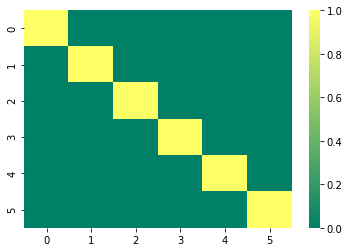

In [221]:
import seaborn as sns
sns.heatmap(corr_x,cmap='summer')

In [222]:
#performing PCA on test data

In [223]:
from sklearn.decomposition import PCA

In [224]:
sklearn_pca=PCA(n_components=0.95)

In [225]:
sklearn_pca.fit(t)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [226]:
t_transformed=sklearn_pca.transform(t)

In [227]:
print(t_transformed.shape)

(4209, 6)


In [228]:
t_transformed=pd.DataFrame(t_transformed)

In [229]:
t_transformed.head()

,0,1,2,3,4,5
0,14.583362,14.166725,13.538576,2.408358,11.319422,6.942207
1,-15.251613,-7.736756,-7.454951,-2.662034,11.593793,1.159404
2,11.856465,-1.680173,-9.989615,14.918866,-1.088862,-2.691304
3,12.606882,13.871583,14.143968,-8.224169,1.683164,-3.704103
4,-11.897597,2.735944,18.424166,5.053374,0.359332,-1.415910


In [230]:
corr_t=t_transformed.corr()

In [231]:
corr_t

,0,1,2,3,4,5
0,1.000000e+00,4.345709e-16,-3.587890e-17,-6.429645e-17,-4.298806e-17,1.461456e-16
1,4.345709e-16,1.000000e+00,-2.522134e-16,4.517406e-16,-1.387724e-17,-9.397728e-17
2,-3.587890e-17,-2.522134e-16,1.000000e+00,-9.070661e-16,5.954733e-16,-4.453108e-16
3,-6.429645e-17,4.517406e-16,-9.070661e-16,1.000000e+00,-1.216807e-16,2.763643e-16
4,-4.298806e-17,-1.387724e-17,5.954733e-16,-1.216807e-16,1.000000e+00,-1.799046e-14
5,1.461456e-16,-9.397728e-17,-4.453108e-16,2.763643e-16,-1.799046e-14,1.000000e+00


<AxesSubplot:>

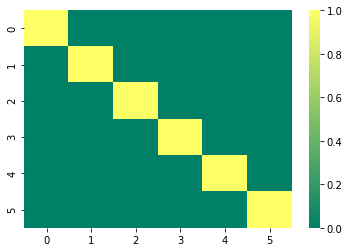

In [232]:
import seaborn as sns
sns.heatmap(corr_t,cmap='summer')

In [233]:
#Predict your test_df values using xgboost
#the train model has an R^2 of 0.79 which is good though the RMSE is high at almost 5. 

In [234]:
import xgboost
from xgboost import XGBRegressor

In [235]:
#train data: train_benz 
#test data: test_benz
#y: benz_target

In [236]:
train_benz=train_benz.drop(['y'], axis=1)
train_benz.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,32,23,17,0,3,24,9,14,0,0,...,0,0,1,0,0,0,0,0,0,0
1,32,21,19,4,3,28,11,14,0,0,...,1,0,0,0,0,0,0,0,0,0
2,20,24,34,2,3,27,9,23,0,0,...,0,0,0,0,0,0,1,0,0,0
3,20,21,34,5,3,27,11,4,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,23,34,5,3,12,3,13,0,0,...,0,0,0,0,0,0,0,0,0,0


In [237]:
test_benz.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,21,23,34,5,3,26,0,22,0,0,...,0,0,0,1,0,0,0,0,0,0
1,42,3,8,0,3,9,6,24,0,0,...,0,0,1,0,0,0,0,0,0,0
2,21,23,17,5,3,0,9,9,0,0,...,0,0,0,1,0,0,0,0,0,0
3,21,13,34,5,3,31,11,13,0,0,...,0,0,0,1,0,0,0,0,0,0
4,45,20,17,2,3,30,8,12,0,0,...,1,0,0,0,0,0,0,0,0,0


In [238]:
model = xgboost.XGBRegressor()

In [239]:
train_x=train_benz.values
train_y=benz_target.values
model.fit(train_x,train_y)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [240]:
y_predict=model.predict(train_benz.values)
y_predict

array([129.1282  ,  89.794235,  75.666824, ..., 110.53154 ,  88.611435,
       101.73209 ], dtype=float32)

In [241]:
from sklearn.metrics import r2_score
from math import sqrt
from sklearn.metrics import mean_squared_error

In [242]:
print('Benz Train r2 score: ', r2_score(y_predict, benz_target))
train_mse = mean_squared_error(y_predict, benz_target)
train_rmse = np.sqrt(train_mse)
print('Train RMSE: %.2f' % train_rmse)

Benz Train r2 score:  0.7919834171927957
Train RMSE: 4.93


In [243]:
test_benz['y'] = model.predict(test_benz.values)

In [244]:
test_benz.head()
#y is added as the last column

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X376,X377,X378,X379,X380,X382,X383,X384,X385,y
0,21,23,34,5,3,26,0,22,0,0,...,0,0,1,0,0,0,0,0,0,99.449081
1,42,3,8,0,3,9,6,24,0,0,...,0,1,0,0,0,0,0,0,0,114.263878
2,21,23,17,5,3,0,9,9,0,0,...,0,0,1,0,0,0,0,0,0,100.843636
3,21,13,34,5,3,31,11,13,0,0,...,0,0,1,0,0,0,0,0,0,80.435280
4,45,20,17,2,3,30,8,12,0,0,...,0,0,0,0,0,0,0,0,0,111.631790


In [124]:
#calculated y values for the test data frame for Mercedes Benz are below. 
test_benz['y']

0        99.449081
1       114.263878
2       100.843636
3        80.435280
4       111.631790
           ...    
4204    113.314850
4205     96.064705
4206     91.614700
4207    108.987579
4208     94.225243
Name: y, Length: 4209, dtype: float32